In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib
matplotlib.use("Agg")
import scipy.io as sio

# from other_utils import np_utils, sk_utils
import numpy as np
import tensorflow as tf
import os
from termcolor import colored
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import matplotlib.gridspec as gridspec
 

import model_componets as comps
from data_loader import DataLoader
from commons import transform_util as tr_util
from model_componets import *
import vis_image as vis

import random
import cv2


Tensor("Const:0", shape=(3,), dtype=float32)
Tensor("Const_1:0", shape=(17, 3), dtype=float32)


In [3]:
from natsort import natsorted
import glob

In [4]:
image_data = natsorted(glob.glob('/data/vcl/anirudh_rule_based/concept_figure/cropped_frames/vid_4_1/*.jpg'))

pose_data = natsorted(glob.glob('/data/vcl/anirudh_rule_based/concept_figure/cropped_frames/vid_4_1/*.mat'))

In [6]:
# images = glob.glob(ran_video+'/*')


# def getint(name):
#     basename = name.split('_')[-1]
#     num = basename.split('.')[0]
#     return int(num)

# images.sort(key=getint)

# k = np.random.choice(np.arange(80))

# video_seq = images[::9]

# pose_seq = [i.replace("png","mat").replace("center_crops","17j_poses_3d") for i in video_seq]

# video_seq = sio.loadmat(data[0])['image'][0]

# pose_seq = sio.loadmat(data[0])['pose_3d']

video_seq = np.array([ plt.imread(i) for i in image_data])

pose_seq = np.array([sio.loadmat(i)['pose_3d'] for i in pose_data])


In [7]:
fig = vis.get_figure()
ax = vis.get_ax(pose_seq[0],fig)
vis.plot_skeleton_and_scatter(pose_seq[0],ax)
plt.savefig('demo.png', transparent=True)



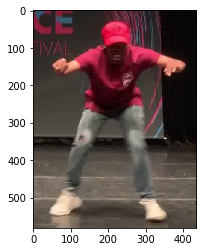

In [31]:
%matplotlib inline
plt.imshow(video_seq[0])

In [32]:
import matplotlib
# matplotlib.use('Agg')
import glob
import scipy.io as sio
from natsort import natsorted
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
pi = math.pi
from commons import transform_util,skeleton_utils,vis_image
from termcolor import colored

In [64]:
limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 11, 0, 13, 14, 15]#17joints
# limb_parents = [0, 0, 1, 2, 3, 1, 5, 6, 1, 0, 9, 10, 0, 12, 13]#15joints

def get_ax(joints_3d, fig, az=0, ele=10, subplot='111'):
    x, y, z = subplot
    ax = fig.add_subplot(subplot, projection='3d')

    lim = np.max(np.abs(joints_3d))
    ax.view_init(azim=az, elev=ele)

    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(-lim, lim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    return ax

def plot_skeleton(ax, ske,color_ours,az, ground_size=0.5):
        lcolor = color_ours[0]
        rcolor = color_ours[1]
        ax.grid(False)
#         # Hide axes ticks
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.set_zticks([])
#         plt.axis('off')
#         ax.set_aspect('equal')
        ax.elev = 10
        ax.azim = az
#         ax.azim = 0 
#         ax.dist = 9
#         ax.set_xlim(-10, 10)
#         ax.set_ylim(-10, 10)
#         ax.set_zlim(-10, 10)
        
        

        lim = np.max(np.abs(ske))
#         ax.view_init(azim=az, elev=ele)

        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.set_zlim(-lim, lim)
        
        ax.set_xlabel('x',labelpad=-8)
        ax.set_ylabel('y',labelpad=-8)
        ax.set_zlabel('z',labelpad = -10)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_zticklabels([])
        ax.axis('off')


        # ax.set_aspect('equal')

#         ax.view_init(azim=90, elev=10)

        C = [{0: lcolor,  1: rcolor}[flag] for flag in lr_flags]
        P = limb_parents

        # Make connection matrix
#         joint_lines = []
        for i in range(ske.shape[0]):
            x = [ske[i, 0], ske[P[i], 0]]
            y = [ske[i, 1], ske[P[i], 1]]
            z = [ske[i, 2], ske[P[i], 2]]
#             x = [ske[i, 0]*1.2, ske[P[i]*1.2, 0]]
#             y = [ske[i, 1]*1.2, ske[P[i]*1.2, 1]]
#             z = [ske[i, 2]*1.2, ske[P[i]*1.2, 2]]
            
            # print x,y,z
            ax.plot(x, y, z, lw=6, c=C[i])
        ax.patch.set_facecolor('None')
#         ax.patch.set_alpha(0.0)


# def get_all_plots(skeleton_strips_male,skeleton_strips_female):
#     m = 10
#     fig=plt.figure(figsize=(4  * 1 , 4))
#     gs = gridspec.GridSpec(1, m)
#     gs.update(wspace=0.05, hspace=0.0005) # set the spacing between axes. 

# #     lcolor, rcolor = colors
#     for j in range(m):
#         idx = j
#         ax = plt.subplot(gs[idx], projection='3d')
#         color_ours = ['blue',  'green']
#         plot_skeleton(ax, skeleton_strips_male[j],color_ours)
# #         color_ours = ['#5879ff',  '#cc2520']
#         color_ours = ['k','m']
#         plot_skeleton(ax, skeleton_strips_female[j],color_ours)
        

#     return fig



# color_ours = ['blue',  'green']
# color_ours = ['#5879ff',  '#cc2520']

lr_flags = [
    1, 1,
    1, 1, 1,
    0, 0, 0,
    1,
    1, 1, 1, 1,
    0, 0, 0, 0,
]

In [67]:
def get_vn_ske(gt_poses_full):
    gt_poses_full_vm = []

    for i in gt_poses_full:
        fit_ske = skeleton_utils.fit_skeleton_frame(i)
        pose_vm = transform_util.root_relative_to_view_norm_skeleton(fit_ske)[1]
        gt_poses_full_vm.append(pose_vm)
    return gt_poses_full_vm


def get_all_plots_images(skeleton_strips):
    m = 10
    fig=plt.figure(figsize=(2 * 2 * 1 , 4))
    gs = gridspec.GridSpec(1, 1)
#     gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 
    gs.update(wspace=0.0001, hspace=0.0001) 

    for j in range(m):
        idx = 0
        ax = plt.subplot(gs[idx])
        k=cv2.resize(skeleton_strips[j],(224,224)) #mpimg.imread(skeleton_strips[j])
        ax.imshow(k)
        ax.axis('off') 
#         plt.tight_layout()
        plt.savefig("/data/vcl/anirudh_rule_based/concept_figure/cropped_frames/vid_4_1/image_{}.png".format(j), transperant = True,bbox_inches = 'tight',dpi = 350)
    return fig  



def get_all_plots(skeleton_strips_male ,az):
    m = 10
    fig=plt.figure(figsize=(4  * 1 , 4))
    gs = gridspec.GridSpec(1,1)
#     gs.update(wspace=0.05, hspace=0.4, left = None, right = 0.6, bottom = 0.1, top = 0.9) 

    gs.update(wspace=0.01, hspace=0.01)

#     lcolor, rcolor = colors
    for j in range(m):
        idx = 0
        ax = plt.subplot(gs[idx], projection='3d')
#         subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
#         color_ours = ['blue',  'green']
        color_ours = ['k','m']

#         plot_skeleton(ax, sio.loadmat(skeleton_strips_male[j])['pose_3d'],color_ours,az)

        plot_skeleton(ax, skeleton_strips_male[j],color_ours,az)

#         color_ours = ['#5879ff',  '#cc2520']b
#         color_ours = ['k','m']
#         plot_skeleton(ax, skeleton_strips_female[j],color_ours)
#         plt.tight_layout()
        plt.savefig("/data/vcl/anirudh_rule_based/concept_figure/cropped_frames/vid_4_1/pose_{}.png".format(j),bbox_inches = 'tight',dpi = 350 )

#     plt.tight_layout()

    return fig




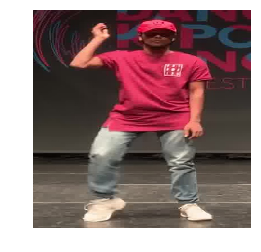

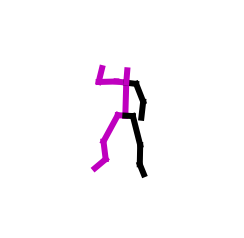

In [68]:
%matplotlib inline
fg = get_all_plots_images(video_seq[:10])
# plt.savefig("/data/vcl/anirudh_rule_based/concept_figure/cropped_frames/vid_9/video_seq.png",bbox_inches = 'tight',dpi = 350);

fig = get_all_plots(np.array(pose_seq)[:10],az = 0)
# plt.savefig("/data/vcl/anirudh_rule_based/concept_figure/cropped_frames/vid_9/pose_seq.png",bbox_inches = 'tight',dpi=350);

# fig = get_all_plots(get_vn_ske(gt_poses_full)[:15],az = -90)
# plt.savefig("./normal_ske_pose.png",bbox_inches = 'tight',dpi=350);c

# az = -90

In [11]:
# sio.savemat('./yt_plots/'+video_seq[0].split('/')[7]+'.mat',{'video_seq':video_seq,'pose_seq':pose_seq})


In [12]:
# video_seq[0].split('/')[7]

In [13]:
# !rm -rf yt_plots/vid_1_video_2070_2160_46.mat

In [14]:
# video_seq[0][0].shape